In [39]:
import numpy as np

from tensorflow import keras
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.models import Model
from os import path, getcwd

In [40]:
print(getcwd())

/Users/max/Dropbox/_repositories/thesis-explorations/src/word2vec


In [41]:
data = np.load(path.join("..", "..", "data", "sets", "line_language.npy"))

In [42]:
data.shape

(5000, 16, 16)

In [72]:
# define input sequence
sequence = data[0].flatten() / 255 # np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))
print(n_in, sequence.shape)

model = keras.Sequential([
    LSTM(512, activation='relu', input_shape=(n_in, 1)),
    RepeatVector(n_in),
    LSTM(512, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])
model.compile(optimizer='adam', loss='mse')
model.summary()

256 (1, 256, 1)
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 512)               1052672   
_________________________________________________________________
repeat_vector_18 (RepeatVect (None, 256, 512)          0         
_________________________________________________________________
lstm_37 (LSTM)               (None, 256, 512)          2099200   
_________________________________________________________________
time_distributed_16 (TimeDis (None, 256, 1)            513       
Total params: 3,152,385
Trainable params: 3,152,385
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(sequence, sequence, epochs=300)

==========] - 1s 583ms/sample - loss: 0.0217
Epoch 63/300
1/1 [==============================] - 1s 591ms/sample - loss: 0.0217
Epoch 64/300
1/1 [==============================] - 1s 584ms/sample - loss: 0.0217
Epoch 65/300
1/1 [==============================] - 1s 610ms/sample - loss: 0.0217
Epoch 66/300
1/1 [==============================] - 1s 609ms/sample - loss: 0.0217
Epoch 67/300
1/1 [==============================] - 1s 589ms/sample - loss: 0.0217
Epoch 68/300
1/1 [==============================] - 1s 626ms/sample - loss: 0.0217
Epoch 69/300
1/1 [==============================] - 1s 663ms/sample - loss: 0.0217
Epoch 70/300
1/1 [==============================] - 1s 666ms/sample - loss: 0.0217
Epoch 71/300
1/1 [==============================] - 1s 602ms/sample - loss: 0.0217
Epoch 72/300
1/1 [==============================] - 1s 640ms/sample - loss: 0.0217
Epoch 73/300
1/1 [==============================] - 1s 600ms/sample - loss: 0.0217
Epoch 74/300
1/1 [========================

In [74]:
yhat = model.predict(sequence, verbose=0)
print(yhat[0,:,0])

[-0.00184503 -0.00164764 -0.00159685 -0.00165006 -0.00172375 -0.00177272
 -0.00176999 -0.00168482 -0.00149781 -0.00120877 -0.00082395 -0.0003591
  0.00017114  0.00075944  0.00139795  0.00207857  0.00279357  0.00353587
  0.00429915  0.00507793  0.0058675   0.00666394  0.00746396  0.00826501
  0.00906483  0.00986158  0.01065381  0.01144037  0.01222036  0.01299295
  0.01375703  0.01451161  0.0152561   0.01599013  0.01671353  0.01742621
  0.01812822  0.01881963  0.01950056  0.02017114  0.02083156  0.02148196
  0.02212252  0.02275342  0.02337485  0.02398696  0.02458994  0.02518364
  0.02576591  0.02633715  0.02689774  0.02744802  0.02798832  0.02851892
  0.02904012  0.02955217  0.03005533  0.03054982  0.03103586  0.03151367
  0.03198344  0.03244539  0.03290218  0.03335324  0.03379751  0.03423384
  0.03466089  0.03507793  0.0354846   0.03588077  0.03626646  0.03664038
  0.0369999   0.03734349  0.03767071  0.03798167  0.03827688  0.03855703
  0.03882292  0.03907545  0.0393133   0.03953627  0.

In [59]:
import matplotlib.pyplot as plt

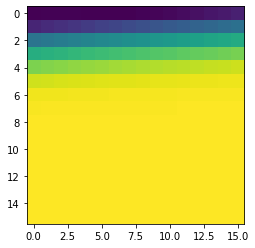

In [78]:
plt.imshow(yhat.reshape(16, 16))

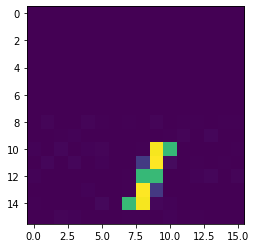

In [79]:
plt.imshow(data[0])